#Продвинутый Python, ДЗ-3

Правила игры:

В домашке 8 задач, разбаловка указана в задании. Суммарно за дз можно получить 100 баллов, что равняется 10 баллам

Дедлайн - 7 дней после выдачи дз. Необходимо залить решеннный ноутбук в github и прислать ссылку в Anytask (без выполнения любого из пунктов работа проверяться не будет)

В данной домашке нужно рисовать графики с помощью matplotlib или же seaborn. Обратите внимание, что все графики и оси должны быть подписаны, графики должны выглядеть аккуратно (за это будем штрафовать)

## Данные

В этом домашнем задании вам придется оказаться на месте аналитика в бразильском маркетплейсе [Olist](https://olist.com/pt-br/). Вам необходимо исследовать данные и на их основании сделать выводы, которые помогут бизнесу расцветать!

Данные находятся тут в файле archive.zip

In [1]:
%pip install wget # dont't forget to change % -> !

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import wget

url = 'https://github.com/Palladain/Deep_Python/raw/main/Homeworks/Homework_1/archive.zip'
filename = wget.download(url)

with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('./')

customers = pd.read_csv('olist_customers_dataset.csv')
location = pd.read_csv('olist_geolocation_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
translation = pd.read_csv('product_category_name_translation.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')

Ван дано 9 датасетов, которые содержат в себе все данные по 100 000 заказам со всей Бразилии. Чтобы облегчить вам жизнь, вот связи по этим датасетам (файл product_category_name_translation является переводом названий категорий с португальского на английский)

![](https://i.imgur.com/HRhd2Y0.png)

Ну что же, начнем!

## Задание 1 (20 баллов)

Визуализируйте зависимость между средним числом покупок товара и:

* числом фотографий товара

* кол-во символов в описании товара (аггрегируйте с шагом 20)

* кол-во символов в названии (аггрегируйте с шагом 5)

Для подсчета среднего числа покупок нужно посчитать по каждому товару число продаж, а затем взять среднее от него (учтите, что мы считаем только доставленные заказы)

Первый пункт:

/var/folders/dj/30dsg7n53xq2qg8xkn96drq00000gn/T/ipykernel_16416/1407304739.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res2['product_description_lenght'] = res2['product_description_lenght'].apply(lambda x: (x // 20 * 20))
/var/folders/dj/30dsg7n53xq2qg8xkn96drq00000gn/T/ipykernel_16416/1407304739.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res3['product_name_lenght'] = res3['product_name_lenght'].apply(lambda x: ((x // 5 * 5)))


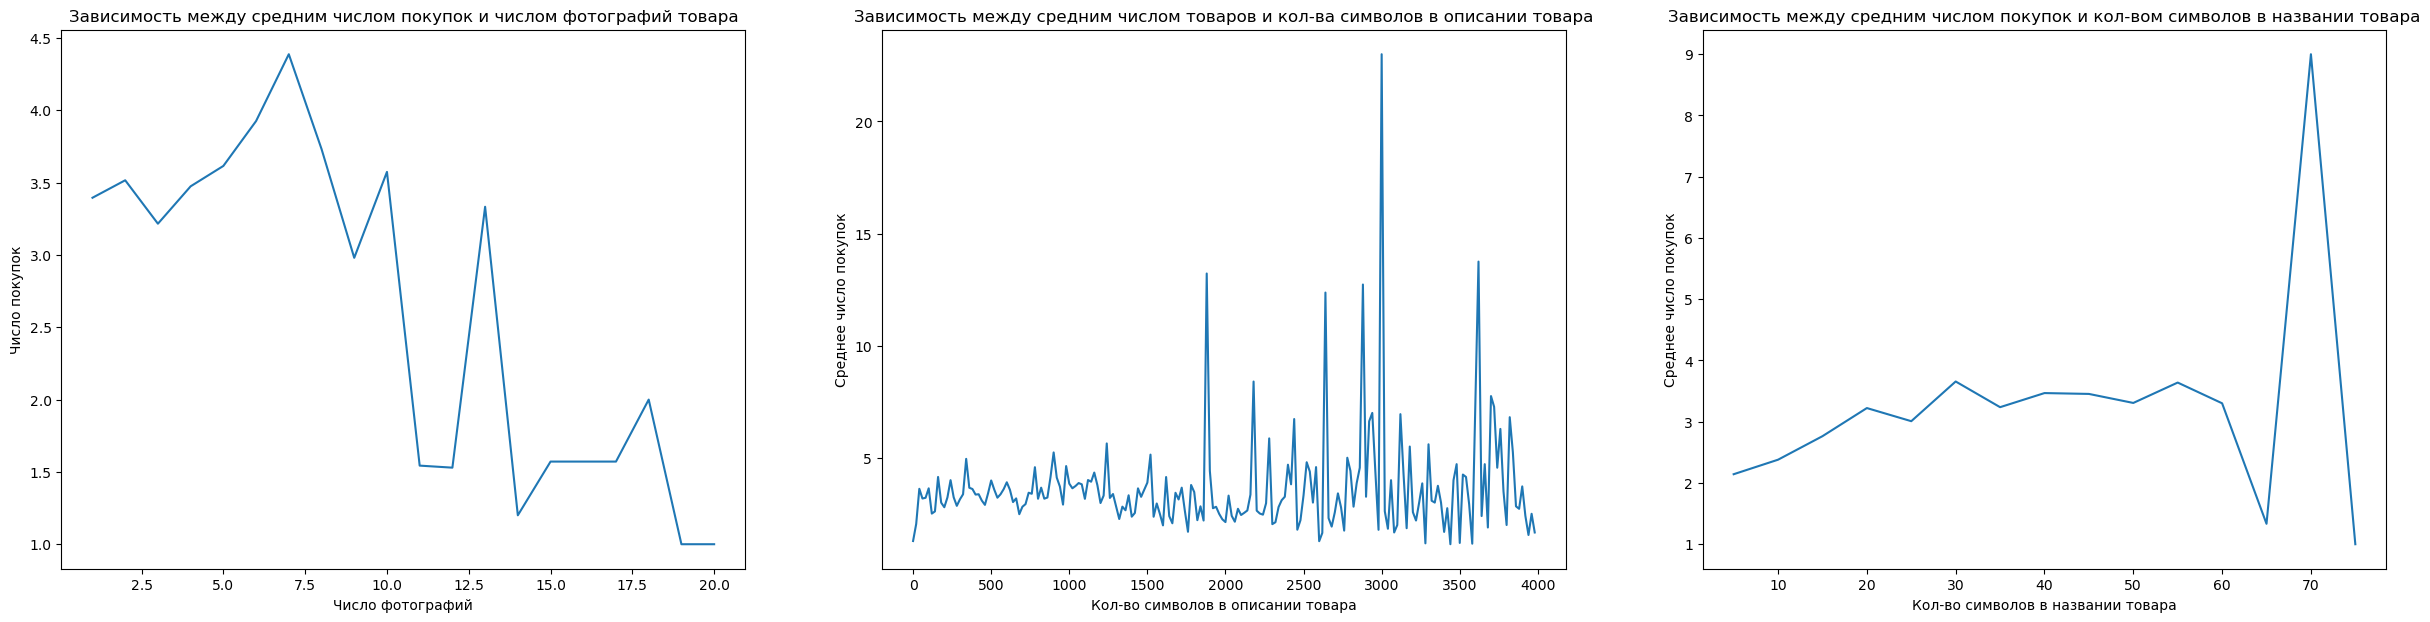

In [80]:
plt.figure(figsize=(30, 7))
res1 = items.join(products[['product_id', 'product_photos_qty']].set_index('product_id'), how='inner', on='product_id').join(orders[['order_id', 'order_status']].set_index('order_id'), how='inner', on='order_id')
res1 = res1[res1['order_status'] == 'delivered']
orders_count = res1.groupby('product_id').agg({'order_id': 'count'}).reset_index()
res1 = pd.merge(res1, orders_count, on='product_id')
res1 = res1[['product_id', 'product_photos_qty', 'order_id_y']].drop_duplicates()
res1 = res1.groupby('product_photos_qty').agg({'order_id_y' : 'mean'}).reset_index() # orders to photos

plt.subplot(1, 3, 1) # первый пункт
plt.plot(res1['product_photos_qty'], res1['order_id_y'])
plt.title('Зависимость между средним числом покупок и числом фотографий товара')
plt.xlabel('Число фотографий')
plt.ylabel('Число покупок')


res2 = products[['product_id', 'product_description_lenght']]
res2['product_description_lenght'] = res2['product_description_lenght'].apply(lambda x: (x // 20 * 20))
group_items = items.join(orders[orders['order_status'] == 'delivered'].set_index('order_id'), how='inner', on='order_id')
group_items = group_items[['product_id', 'order_id']].groupby('product_id').count().reset_index()
res2 = res2.join(group_items.set_index('product_id'), how='inner', on='product_id')

plt.subplot(1, 3, 2) # второй пункт
plot = res2.groupby('product_description_lenght').agg({'order_id' : 'mean'}).reset_index()
plt.plot(plot['product_description_lenght'], plot['order_id'])
plt.xlabel('Кол-во символов в описании товара')
plt.ylabel('Среднее число покупок')
plt.title('Зависимость между средним числом товаров и кол-ва символов в описании товара')

res3 = products[['product_id', 'product_name_lenght']]
res3['product_name_lenght'] = res3['product_name_lenght'].apply(lambda x: ((x // 5 * 5)))
items_orders = items.join(orders[orders['order_status'] == 'delivered'].set_index('order_id'), how='inner', on='order_id').groupby('product_id').count().reset_index()
res3 = res3.join(items_orders.set_index('product_id'), how='inner', on='product_id')
res3 = res3.groupby('product_name_lenght').agg({'order_id' : 'mean'}).reset_index()

plt.subplot(1, 3, 3) # третий пункт
plt.plot(res3['product_name_lenght'], res3['order_id'])
plt.xlabel('Кол-во символов в названии товара')
plt.ylabel('Среднее число покупок')
plt.title('Зависимость между средним числом покупок и кол-вом символов в названии товара')
plt.show()




## Задание 2 (10 баллов)

Отобразите среднюю сумму оплаты по типу оплаты (для этого вам нужна табличка payments)

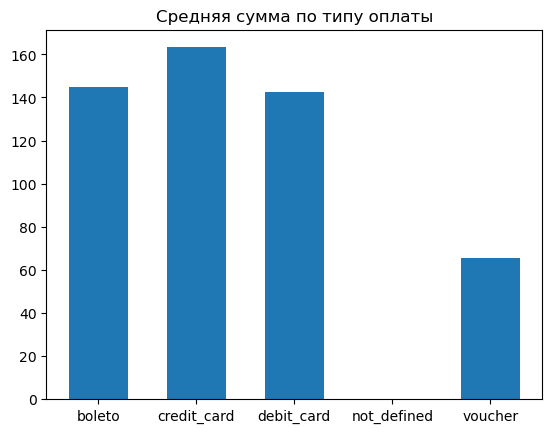

In [52]:
res = payments.groupby('payment_type').agg({'payment_value' : 'mean'}).reset_index()
plt.bar(res['payment_type'], res['payment_value'], width=0.6)
plt.title('Средняя сумма по типу оплаты')
plt.show()

## Задание 3 (25 баллов)

Обратите внимание на число платежей (payment_installments). Выясните, какая сумма оплаты указана: за целую покупку или только за ее часть? (Обратите внимание, что в данных есть определенная бага, которую нужно расследовать и учесть)

Также покажите средний чек в зависимости от числа оплат. Есть ли какая-то связь между ними?

Если payment_installments > 1, то не сходится, в случе когда = 1 -> сходится

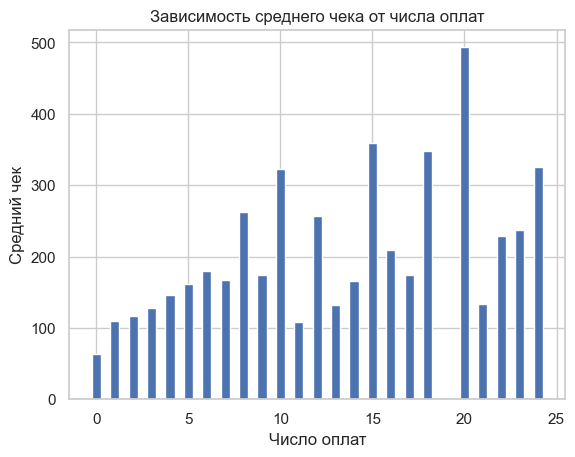

In [90]:
res = items.join(payments[['order_id', 'payment_installments']].set_index('order_id'), how='inner', on = 'order_id')
res['total_payment'] = res['price'] + res['freight_value']
res = res.groupby('payment_installments').agg({'total_payment' : 'mean'}).reset_index()

plt.bar(res['payment_installments'], res['total_payment'], width=0.5)
plt.title('Зависимость среднего чека от числа оплат')
plt.xlabel('Число оплат')
plt.ylabel('Cредний чек')
plt.show()

В среднем чем больше опалт, тем больше чек(есть и исключения)

## Задание 4 (15 баллов)

Визуализируйте зависимость между ценой заказа и ценой доставки по штатам покупки. Есть ли какая-нибудь зависимость и как вы можете ее обосновать?

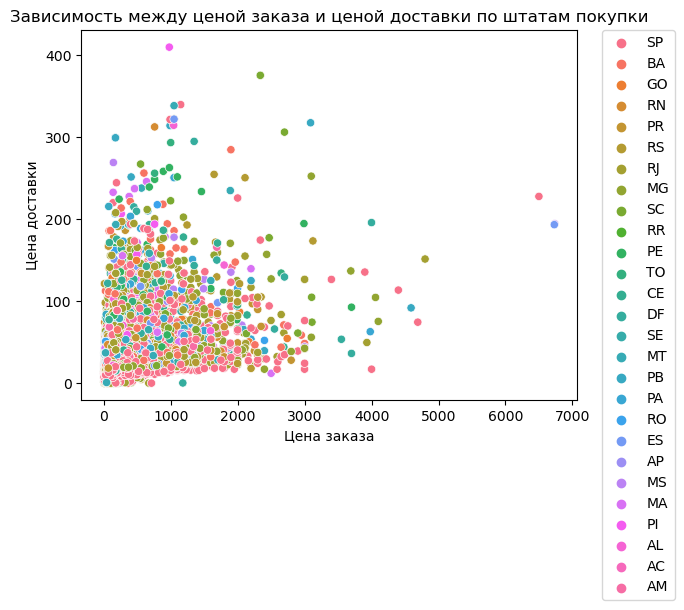

In [86]:

res = orders[['order_id', 'customer_id']].join(items[['order_id', 'price', 'freight_value']].set_index('order_id'), how='inner', on='order_id')
res = res.join(customers[['customer_id', 'customer_state']].set_index('customer_id'), how='inner', on='customer_id')
res['total_costs'] = res['price'] + res['freight_value']

sns.scatterplot(x='price', y='freight_value', hue='customer_state', data=res)
plt.title('Зависимость между ценой заказа и ценой доставки по штатам покупки')
plt.xlabel('Цена заказа')
plt.ylabel('Цена доставки')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

## Задание 5 (15 баллов)

Отобразите распределение оценок для заказов, которые были доставлены вовремя и которые пришли с опозданием. Насколько влияет факт опоздания на оценку? (оценки берутся из таблицы reviews)

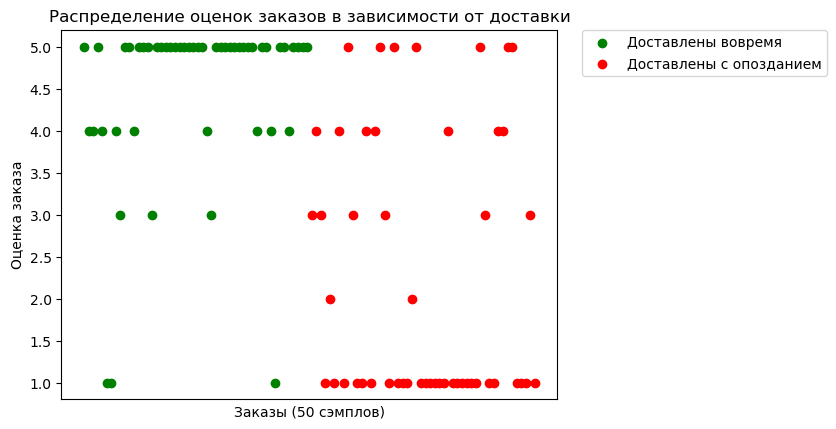

In [67]:
res = orders.join(reviews[['order_id', 'review_score']].set_index('order_id'), how='inner', on='order_id')
res['in_time'] = res['order_delivered_customer_date'] <= res['order_estimated_delivery_date']

orders_in_time = res[res['in_time'] == True].sample(50)
orders_our_of_time = res[res['in_time'] == False].sample(50)

plt.scatter(orders_in_time['order_id'], orders_in_time['review_score'], color = 'green', label = 'Доставлены вовремя')
plt.scatter(orders_our_of_time['order_id'], orders_our_of_time['review_score'], color = 'red', label = 'Доставлены с опозданием')
plt.title('Распределение оценок заказов в зависимости от доставки')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.ylabel('Оценка заказа')
plt.xlabel('Заказы (50 сэмплов)')
plt.xticks([])
plt.show()

In [74]:
res = orders.join(reviews[['order_id', 'review_score']].set_index('order_id'), how='inner', on='order_id')
res['in_time'] = res['order_delivered_customer_date'] <= res['order_estimated_delivery_date']
o_in_time = res[res['in_time'] == True]
o_our_of_time = res[res['in_time'] == False]

cnt_in_time = o_in_time[o_in_time['review_score'] >= 4]['review_score'].count()
cnt_out_of_time = o_our_of_time[o_our_of_time['review_score'] >= 4]['review_score'].count()
percent_in_time = cnt_in_time / o_in_time['review_score'].count()
percent_delayed = cnt_out_of_time / o_our_of_time['review_score'].count()

print('Оценка 4 и 5 у вовремя доставленных заказов:', format(percent_in_time * 100, '.0f') + '%') 
print('Оценка 4 и 5 у опаздавших заказов:', format(percent_delayed * 100, '.0f') + '%') 

Оценка 4 и 5 у вовремя доставленных заказов: 83%
Оценка 4 и 5 у опаздавших заказов: 29%


Не турдно заметить что, когда заказ доставлен вовремя, его оценка выше и наоборот, если заказ доставлен с опаздание, то оценка как правило стремится к "1" (это можно заметить запустив программу несколько раз). Это вполне естественно, значит программа верна, ведь многие товары клиентам важно получить именно в срок, а не когда-либо ещё. Будем считать, что оценки 4 и 5 это хорошие оценки, высше посчитанно соотношение в случаях когда заказ доставлен ввормея или нет.

## Задание 6 (15 баллов)

Изобразите зависимость между ценой заказа и числом дней между покупкой и доставкой с разбивкой по признаку "есть заказ из другого штата". Есть ли зависимость?

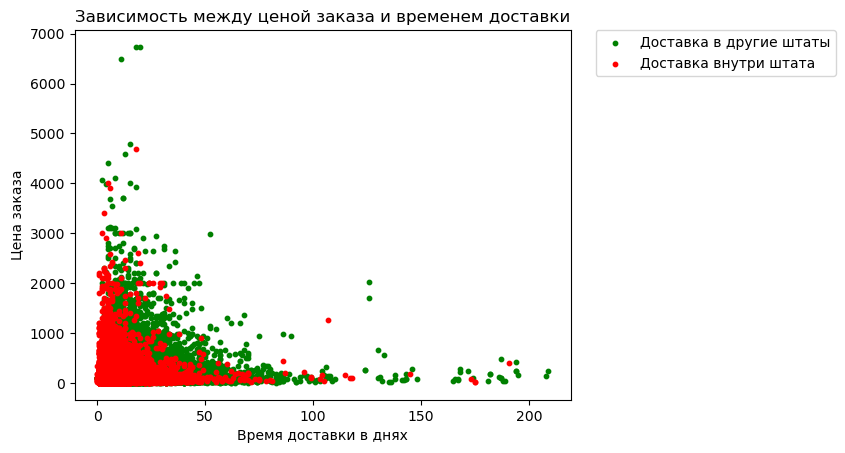

In [81]:
df = orders.copy()
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['delivery_time'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days
df = items.join(df[['order_id', 'delivery_time']].set_index('order_id'), how='inner', on='order_id')
df = df.join(orders[['order_id', 'customer_id']].set_index('order_id'), how='inner', on='order_id')
df = df.join(customers[['customer_id', 'customer_state']].set_index('customer_id'), how='inner', on='customer_id')
df = df.join(sellers[['seller_id', 'seller_state']].set_index('seller_id'), how='inner', on='seller_id')
ordesr_to_different_states = df[df['customer_state'] != df['seller_state']]
orders_in_state = df[df['customer_state'] == df['seller_state']]

plt.scatter(ordesr_to_different_states['delivery_time'], ordesr_to_different_states['price'], color = 'green', s = 10, label = 'Доставка в другие штаты')
plt.scatter(orders_in_state['delivery_time'], orders_in_state['price'], color='red', s = 10, label = 'Доставка внутри штата')
plt.title('Зависимость между ценой заказа и временем доставки')
plt.xlabel('Время доставки в днях')
plt.ylabel('Цена заказа')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()